<a href="https://colab.research.google.com/github/BandreddyNithin19/Employee-Analysis-Nexus/blob/main/Bandreddy_Nithin(Google_Colab_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
file_path = '/content/drive/MyDrive/Files/weather.csv'
df = pd.read_csv(file_path)
df

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1             39.0          E          W           4.0  ...           36   
2             85.0          N        NNE           6.0  ...           69   
3             54.0        WNW          W          30.0  ...           56   
4             50.0        SSE        ESE          20.0  ...           49   
..             ...        ...        ...           ...  ...          ...   
361           76.0        SSE         NW           7.0  ...           15   
362           48.0        NNW        NNW           2.0  ...           22   
363           43.0        ENE        ENE          11.0  ...           47   
364           46.0        SSW        WNW           6.0  ...           39   
365           78.0         NW        WNW          31.0  ...           13   

     Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0         1019.7       1015.0         7         7     14.4     23.6   
1         1012.4       1008.4         5         3     17.5     25.7   
2         1009.5       1007.2         8         7     15.4     20.2   
3         1005.5       1007.0         2         7     13.5     14.1   
4         1018.3       1018.5         7         7     11.1     15.4   
..           ...          ...       ...       ...      ...      ...   
361       1016.1       1010.8         1         3     20.4     30.0   
362       1020.0       1016.9         0         1     17.2     28.2   
363       1024.0       1022.8         3         2     14.5     18.3   
364       1021.0       1016.2         6         7     15.8     25.9   
365       1009.6       1009.2         1         1     23.8     28.6   

     RainToday  RISK_MM RainTomorrow  
0           No      3.6          Yes  
1          Yes      3.6          Yes  
2          Yes     39.8          Yes  
3          Yes      2.8          Yes  
4          Yes      0.0           No  
..         ...      ...          ...  
361         No      0.0           No  
362         No      0.0           No  
363         No      0.0           No  
364         No      0.0           No  
365         No      0.0           No  

[366 rows x 22 columns]

In [48]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 MinTemp           0
MaxTemp           0
Rainfall         12
Evaporation       2
Sunshine          0
WindGustDir       0
WindGustSpeed     4
WindDir9am        0
WindDir3pm        0
WindSpeed9am      3
WindSpeed3pm      3
Humidity9am       0
Humidity3pm       1
Pressure9am       2
Pressure3pm       1
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM          12
RainTomorrow      0
MinTemp_MA        6
MaxTemp_MA        6
dtype: int64


In [5]:
# Handle missing values
# For numerical columns, fill missing values with the mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [6]:
# For categorical columns, fill missing values with the mode
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [7]:
# Check for outliers
# Detect outliers using z-score
z_scores = np.abs((df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std())
outliers = z_scores > 3
print("Outliers:\n", outliers.sum())

Outliers:
 MinTemp           0
MaxTemp           0
Rainfall         12
Evaporation       2
Sunshine          0
WindGustSpeed     4
WindSpeed9am      3
WindSpeed3pm      3
Humidity9am       0
Humidity3pm       1
Pressure9am       2
Pressure3pm       1
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RISK_MM          12
dtype: int64


In [8]:
# Remove outliers (replace with NaN)
df[outliers] = np.nan

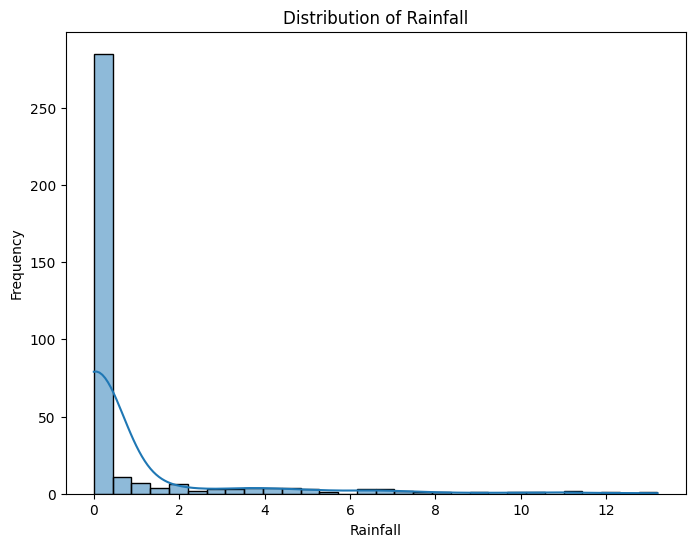

In [9]:
# Visualization 1: Histogram of Rainfall
plt.figure(figsize=(8, 6))
sns.histplot(df['Rainfall'], bins=30, kde=True)
plt.title("Distribution of Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.show()


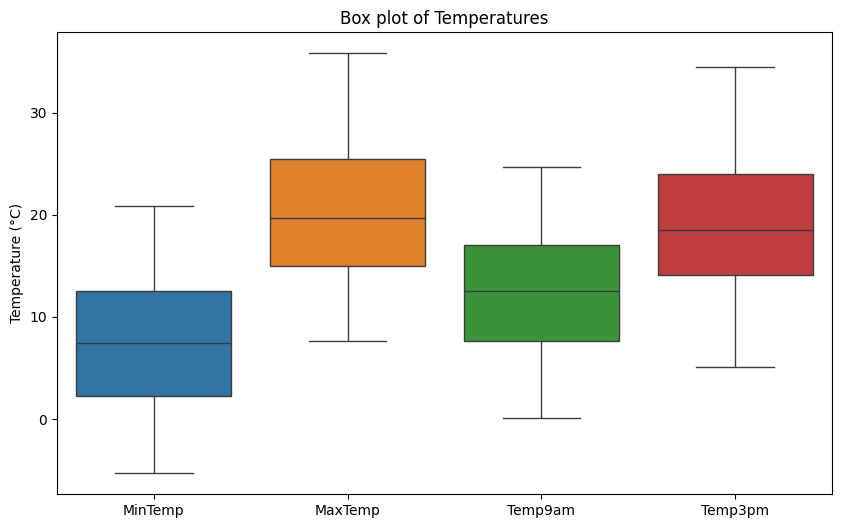

In [10]:
# Visualization 2: Box plot of Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm']])
plt.title("Box plot of Temperatures")
plt.ylabel("Temperature (°C)")
plt.show()

<ipython-input-11-95260d9c5457>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RainToday', data=df, palette='pastel')


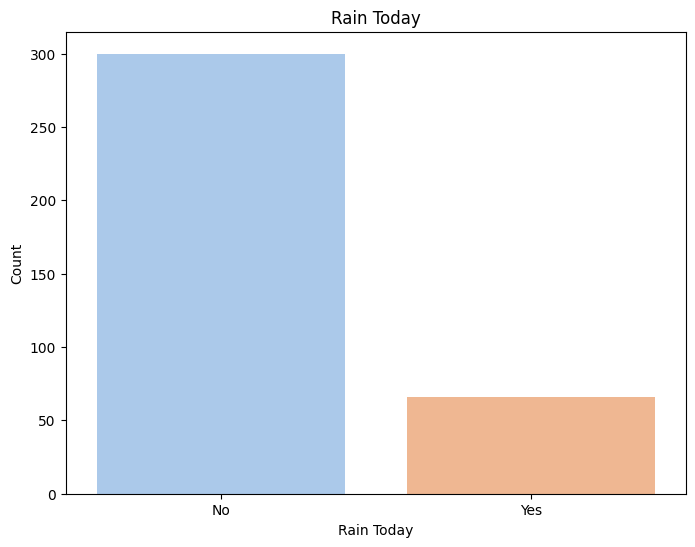

In [11]:
# Visualization 3: Bar plot of RainToday
plt.figure(figsize=(8, 6))
sns.countplot(x='RainToday', data=df, palette='pastel')
plt.title("Rain Today")
plt.xlabel("Rain Today")
plt.ylabel("Count")
plt.show()

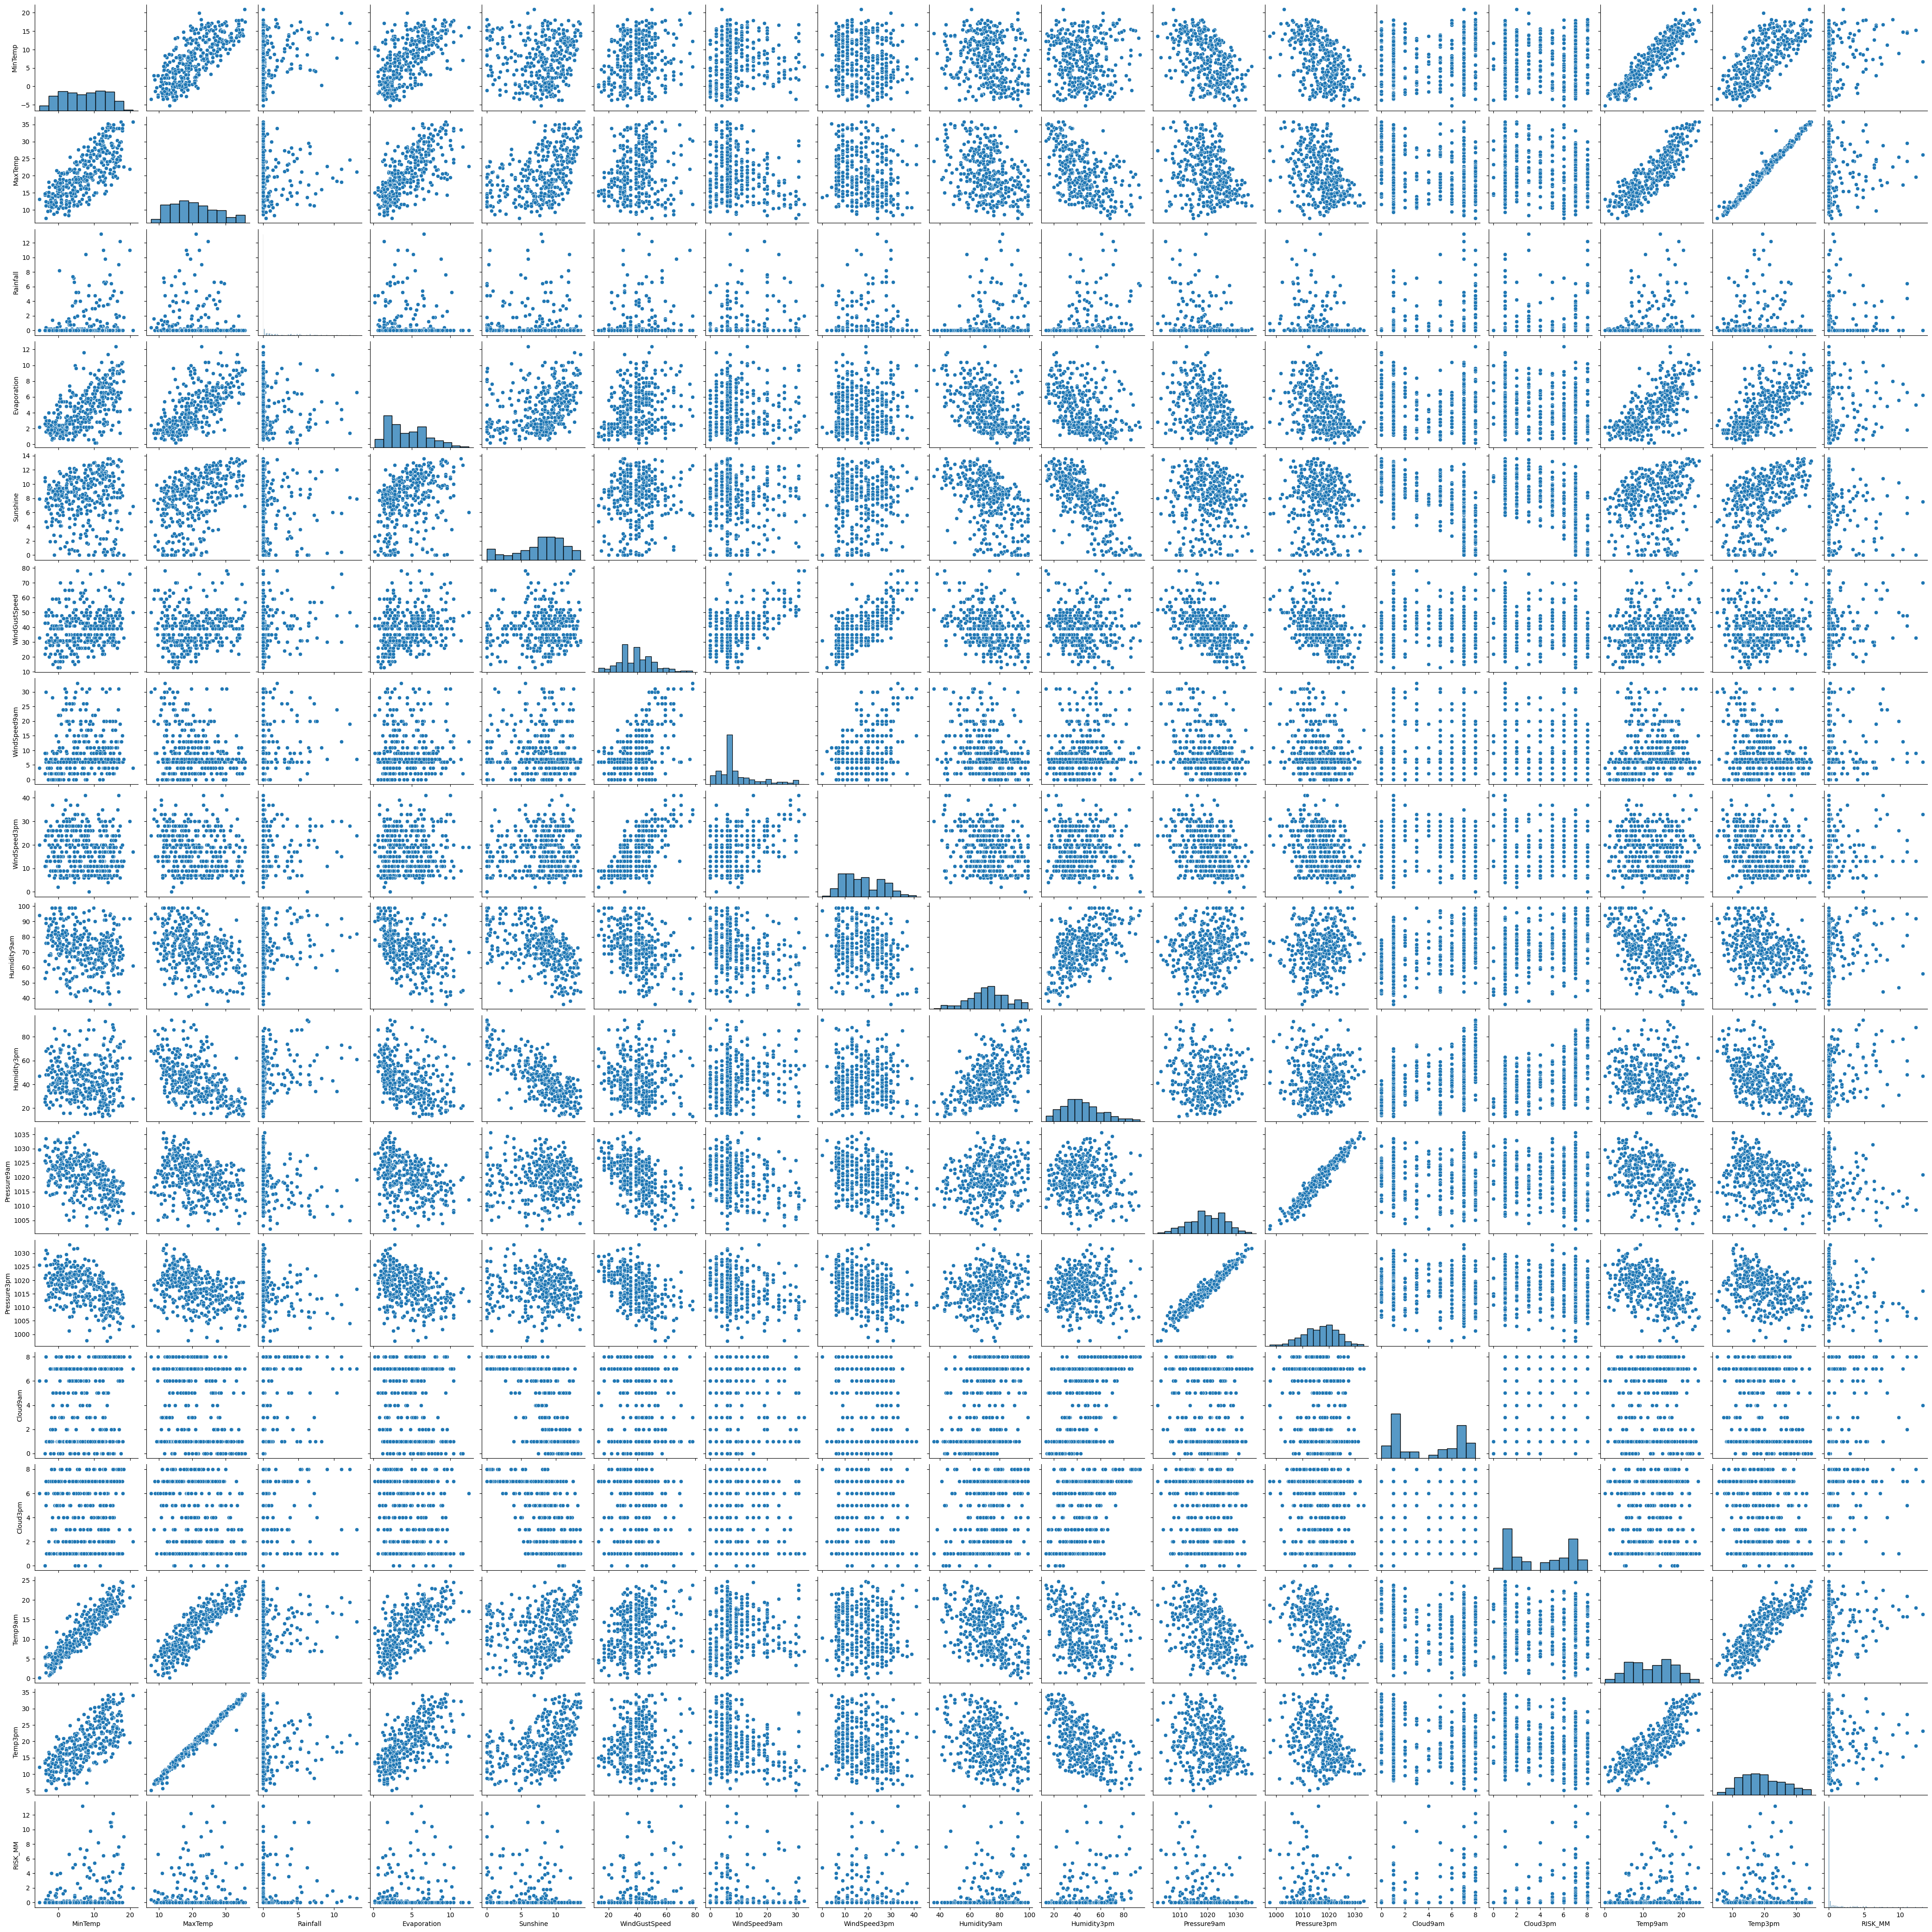

In [13]:
# Visualization 4: Pairplot
sns.pairplot(df, diag_kind='hist')
plt.show()

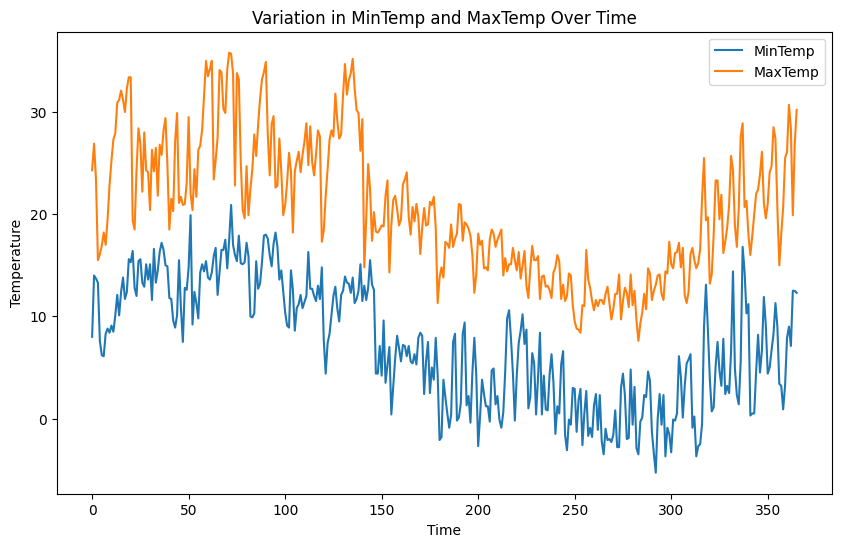

In [44]:
# Visualization 5:Variation in MinTemp and MaxTemp Over Time

time_index = range(len(df))

plt.figure(figsize=(10, 6))
plt.plot(time_index, df['MinTemp'], label='MinTemp')
plt.plot(time_index, df['MaxTemp'], label='MaxTemp')
plt.title('Variation in MinTemp and MaxTemp Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

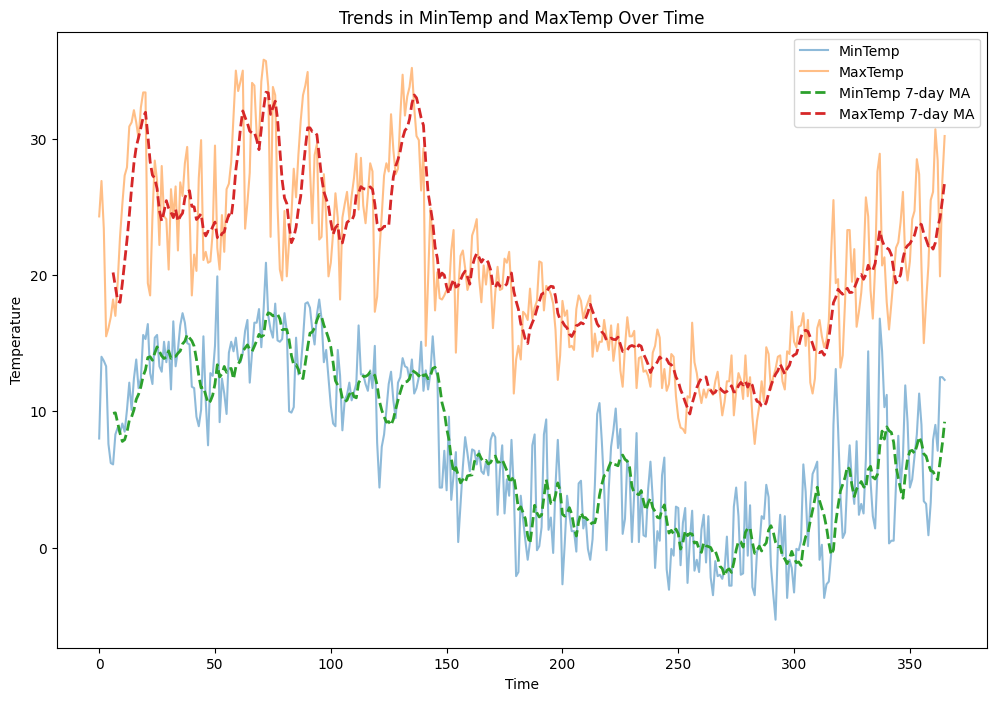

In [46]:
# Visualization 6: Trends in MinTemp and MaxTemp Over Time

# Compute rolling averages for MinTemp and MaxTemp
window_size = 7  # You can adjust the window size based on your data
df['MinTemp_MA'] = df['MinTemp'].rolling(window=window_size).mean()
df['MaxTemp_MA'] = df['MaxTemp'].rolling(window=window_size).mean()

# Plot the original data and rolling averages
plt.figure(figsize=(12, 8))
plt.plot(df['MinTemp'], label='MinTemp', alpha=0.5)
plt.plot(df['MaxTemp'], label='MaxTemp', alpha=0.5)
plt.plot(df['MinTemp_MA'], label=f'MinTemp {window_size}-day MA', linestyle='--', linewidth=2)
plt.plot(df['MaxTemp_MA'], label=f'MaxTemp {window_size}-day MA', linestyle='--', linewidth=2)

plt.title('Trends in MinTemp and MaxTemp Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.show()

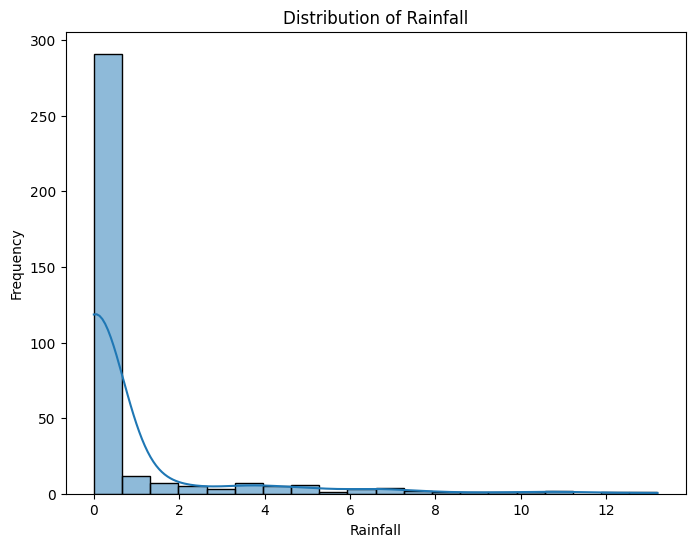

In [47]:
# Visualization 7:Descriptive Statistics
descriptive_stats = df.describe()

# Visualize distribution of a weather parameter (e.g., Rainfall)
plt.figure(figsize=(8, 6))
sns.histplot(df['Rainfall'], bins=20, kde=True)
plt.title("Distribution of Rainfall")
plt.xlabel("Rainfall")
plt.ylabel("Frequency")
plt.show()

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<ipython-input-26-a87f9b90806b>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


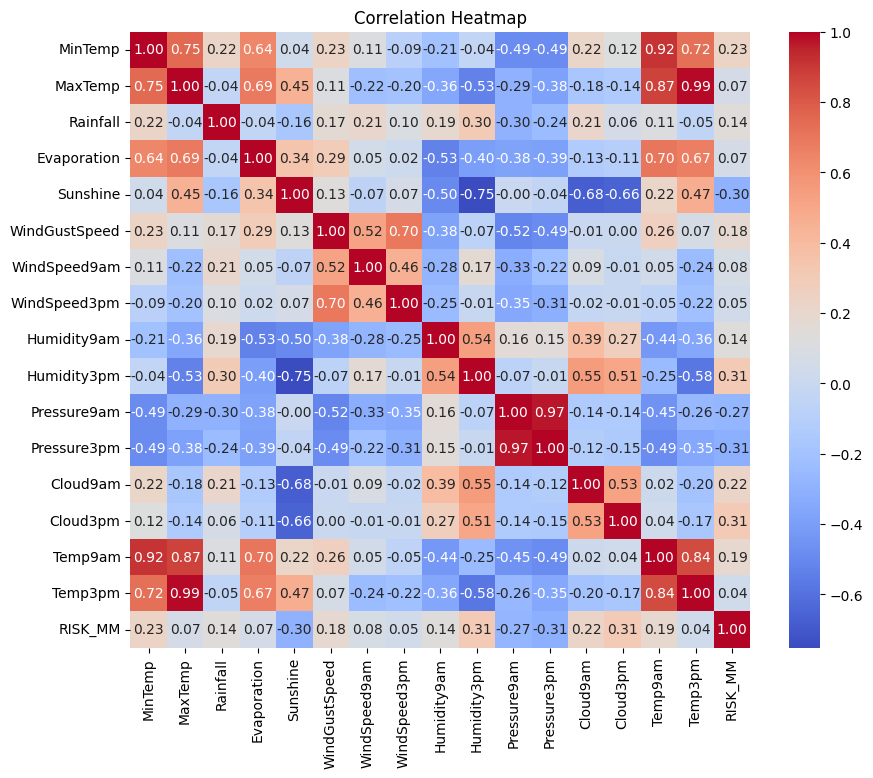

In [26]:
# Step 1: Load the dataset
df = pd.read_csv("weather.csv")

# Step 2: Correlation Analysis
correlation_matrix = df.corr()

# Step 3: Visualize Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [30]:
# Select predictor variables (independent variables) and target variable (dependent variable)
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']]
y = df['RainTomorrow']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [43]:
from sklearn.preprocessing import LabelEncoder

# Step 4: Handle missing values
# Instantiate the imputer with a strategy to replace missing values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the testing data using the trained imputer (do not fit again)
X_test_imputed = imputer.transform(X_test)

# Label encode the target variable (RainTomorrow) for both training and testing data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [39]:
# Step 5: Build the Regression Model
model = LinearRegression()
model.fit(X_train_imputed, y_train_encoded)

LinearRegression()

In [40]:
# Step 6: Evaluate the Model
y_pred_encoded = model.predict(X_test_imputed)
r_squared = r2_score(y_test_encoded, y_pred_encoded)
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
rmse = np.sqrt(mse)

print("R-squared:", r_squared)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

R-squared: 0.25472094910123166
Mean Absolute Error: 0.25115314324929033
Mean Squared Error: 0.12630002907853488
Root Mean Squared Error: 0.35538715378940594


In [41]:
# Step 7: Predictions
predictions_encoded = model.predict(X_test_imputed)
results_encoded = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': predictions_encoded})
print(results_encoded)

    Actual  Predicted
0        0   0.141605
1        0   0.112438
2        0   0.161968
3        0   0.350980
4        0   0.037974
..     ...        ...
69       0  -0.004767
70       1   0.219497
71       0   0.437922
72       0   0.264971
73       0   0.058999

[74 rows x 2 columns]
